<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/Lorentz_Attractor/Lorentz_Attractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strange (Lorentz) Attractors

## Part (a-c) 

In [ ]:
#import all libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

#RK4
def rungeKutta4(f, t_i, y_i, dt):
  f_1 = f(t_i, y_i)
  f_2 = f(t_i + dt/2, y_i + (1/2)*dt*f_1)
  f_3 = f(t_i + dt/2, y_i + (1/2)*dt*f_2)
  f_4 = f(t_i + dt, y_i + dt*f_3)

  y_next = y_i + (1/6)*dt*(f_1 + 2*f_2 + 2*f_3 + f_4)

  return y_next

**Lorentz Equation**

\begin{align*}
    x' &= \frac{dx}{dt} &&= \sigma(y-x)\\
    y' &= \frac{dy}{dt} &&= rx-y-xz\\
    z' &= \frac{dz}{dt} &&= xy - bz\\
\end{align*}

In [ ]:

'''
Attributes
----------
- ts (list)      : saves the time steps
- sigma (float)  : value for sigma
- b (float)      : value for b
- r (float)      : value for r
- dt (float)     : value for the step size (in seconds)
- xs (list)      : list of xs
- ys (list)      : list of ys
- zs (list)      : list of zs


Methods
-------
- update        : uses RK4 to update the variables
- derivatives   : returns the derivatives of the system variables
- display       : display 3D trajectory graph
'''

class ConvectionRoll:
    '''
    This function initializes the class. The attributes are described above.
    '''
    def __init__(self, x0, y0, z0, sigma, b, r, dt):
        self.xs  = [x0]
        self.ys = [y0]
        self.zs  = [z0]
        self.step = dt

        self.sigma = sigma
        self.b = b
        self.r = r
        
        self.ts = [0]
        self.state = (self.xs[-1], self.ys[-1], self.zs[-1])

    def derivative(self, time, state):
        '''
        return the derivatives of our state variables
        '''
        x,y,z = state
        sigma, b, r = self.sigma, self.b, self.r

        x_prime = sigma*(y-x)
        y_prime = r*x - y - x*z
        z_prime = x*y - b*z

        return np.array((x_prime, y_prime, z_prime))

    def update(self):
        '''
        Updates the variables using RK4. 
        '''
        state = self.state
        next_state = rungeKutta4(self.derivative, self.ts[-1], state, self.step)
		        
        x, y, z = next_state

        self.xs.append(x)
        self.ys.append(y)
        self.zs.append(z)

        self.state = next_state

        t_next = self.ts[-1] + self.step
        self.ts.append(t_next)

    def display(self):
        fig = plt.figure(figsize=(14,10))
        points = np.array([self.xs, self.ys, self.zs])
        
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot(points[0], points[1], points[2], marker = '.', linewidth = 0.5)
        ax.scatter(*points.T[0], color = 'red') # initial point
        
        plt.title(f'$\sigma$ = {self.sigma}, r ={self.r:0.2f}, \
        b ={self.b:0.2f}, Time = {self.ts[-1]:0.2f}')
        ax.set_xlabel('x (t)')
        ax.set_ylabel('y (t)')
        ax.set_zlabel('z (t)')
        plt.show()

    

In [ ]:
#initialize the system with given values
sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=20, dt= 0.01)

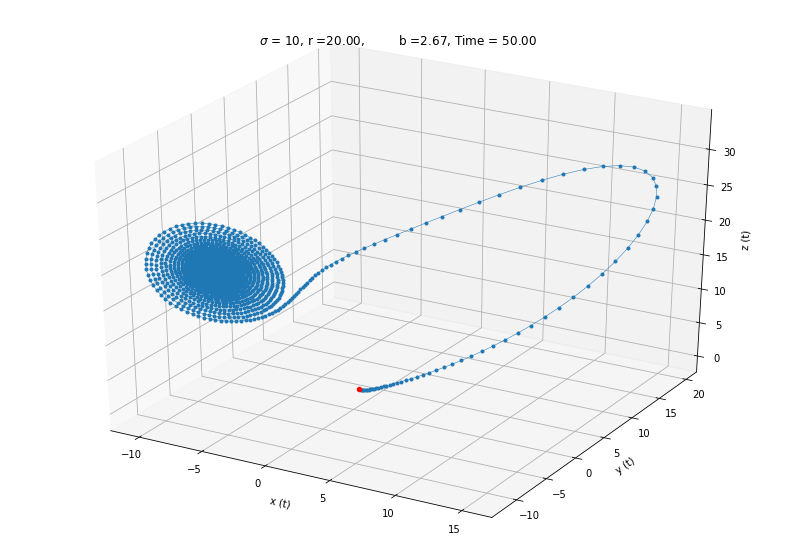

In [ ]:
#let the system run for a while before diplaying the system
for i in range(5000):
    sys.update()
sys.display()

This shows the parametric plots of the trajectory of the solution in all three 
coordinates over time. The red dot represents the initial condition. The line shows the trajectory and the blue dots are the position of the system in each time step. So if the separation between the blue dots are very small in a region, the velocity of the system is smaller. Similarly, if the separation of the blue dots are higher, it means they are covering more space in each timesteps, thus the velocity is higher. We can see that for r = 20, the system is stuck in only one lobe. 

Animation: [Lorentz Attractor for R = 20](https://drive.google.com/file/d/1caopFCFCuEXVOMSrUffhTtBZeUP5GQpb/view?usp=sharing)

Animation: [Lorentz Attractor for R = 28](https://drive.google.com/file/d/1ybFz8PKssfjLG4eLK8lcXui_GDof4_zS/view?usp=sharing)

From the animation we can see that clearly there is two lobes present in the attractor for r=28. But for r=20, there is only one lobe. 

Another point to note is that, once the system ends up in the attractor, it always stays in this attractor. But this attractor is strange because instead of a single point or single periodic path, it is more like a set of patterns. 

Now we can try to see how the x(t), y(t) and z(t) changes over time for different range of r in the range $20\leq r\leq 30$.

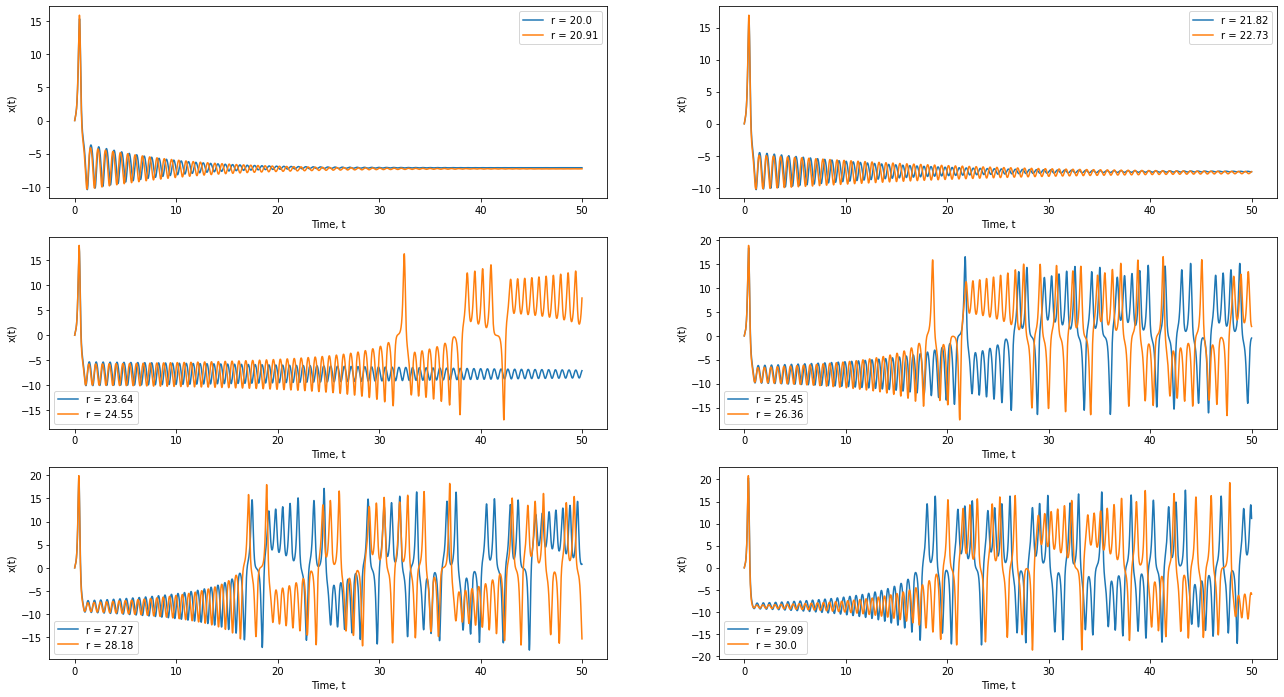

In [ ]:
plt.figure(figsize=(22,12))
rs = np.linspace(20, 30, 12)

for i in range(len(rs)//2):
    plt.subplot(3,2,i+1)

    r = rs[2*i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.xs, label = 'r = '+str(np.round(r,2)))

    r = rs[2*i+1]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.xs, label = 'r = '+str(np.round(r,2)))

    plt.xlabel('Time, t')
    plt.ylabel('x(t)')
    plt.legend()
plt.show()

Animation: [x(t) for varying r](https://drive.google.com/file/d/1JTg6JK-dOn9SFHYPKe_MGaPYsxTFrS5J/view?usp=sharing)

We can see that approximately upto $r = 24$, x(t) follows a single oscillations around $x = -7.5$ and the amplitute of the oscillation decreases over time. Then around the critical value near $24< r < 25$, the amplitute starts increasing and suddenly after $t = 30$, $x(t)$ jumps to another oscillatory state centered around $x=10$. The value of $x(t)$ continues to jump between these two oscillatory states (centered around $x=-7.5$ and $x=10$). As the value of r increases, the first time to jump to the second oscillatory state decreases upto around $t=18$.

The decrease of the starting time of the jumping (upto $t=18$) is easier to see in the animation.

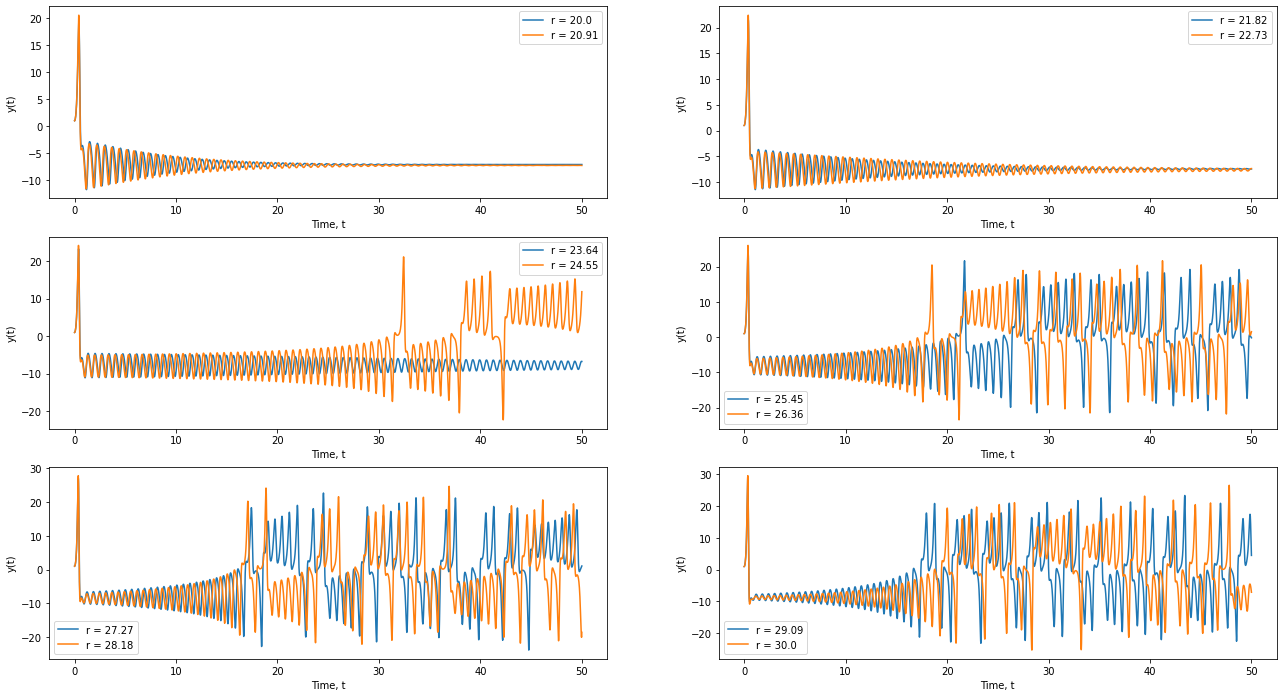

In [ ]:
plt.figure(figsize=(22,12))
rs = np.linspace(20, 30, 12)

for i in range(len(rs)//2):
    plt.subplot(3,2,i+1)

    r = rs[2*i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.ys, label = 'r = '+str(np.round(r,2)))

    r = rs[2*i+1]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.ys, label = 'r = '+str(np.round(r,2)))

    plt.xlabel('Time, t')
    plt.ylabel('y(t)')
    plt.legend()
plt.show()

Animation: [y(t) for varying r](https://drive.google.com/file/d/1AlQrFtzOO9NZ74lkJiwjjoc_Ic8th3Xz/view?usp=sharing)

We can see that behaviour of $y(t)$ is almost similar to that of $x(t)$.

Again, upto $r = 24$, y(t) follows a single oscillations around $y = -7$ and the amplitute of the oscillation decreases over time. Then around the critical value near $24< r < 25$, the amplitute starts increasing and suddenly after $t = 30$, $y(t)$ jumps to another oscillatory state centered around $y=10$. The value of $y(t)$ continues to jump between these two oscillatory states (centered around $y=-7$ and $y=10$). As the value of r increases, the first time to jump to the second oscillatory state decreases upto around $t=18$.

The decrease of the starting time of the jumping (upto $t=18$) is easier to see in the animation.

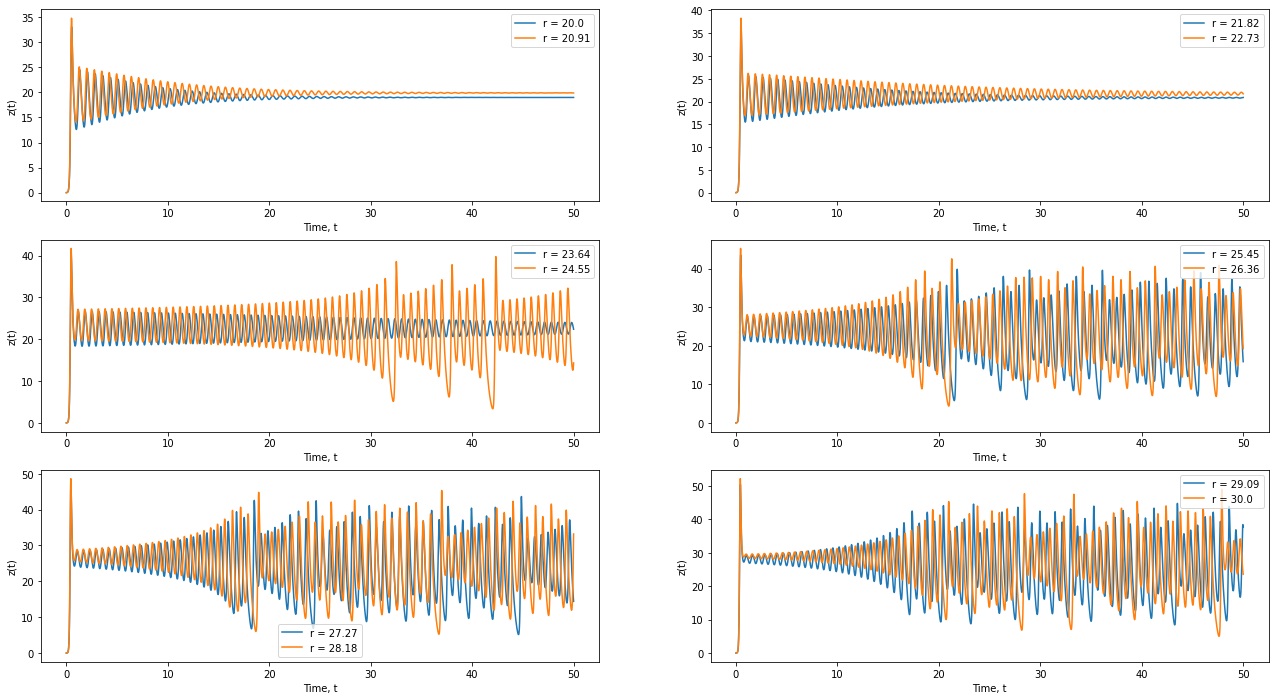

In [ ]:
plt.figure(figsize=(22,12))
rs = np.linspace(20, 30, 12)

for i in range(len(rs)//2):
    plt.subplot(3,2,i+1)

    r = rs[2*i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.zs, label = 'r = '+str(np.round(r,2)))

    r = rs[2*i+1]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(5000):
        sys.update()
    plt.plot(sys.ts, sys.zs, label = 'r = '+str(np.round(r,2)))

    plt.xlabel('Time, t')
    plt.ylabel('z(t)')
    plt.legend()
plt.show()

Animation: [z(t) for varying r](https://drive.google.com/file/d/1HJSLT93sthyNfs_uqUD83zzPZpKK1Pqt/view?usp=sharing)

Again, upto $r = 24$, z(t) follows a single oscillations around $z = 20$ and the amplitute of the oscillation decreases over time. Now around the critical value near $24< r < 25$, it seems like there are another oscillation with a smaller frequency superimposed over the previous oscillation after $t = 30$.

Most probably, we still have two different oscillation like $x(t)$ and $y(t)$, but here they both are centered around the same value. That's why it looks like a superposition of two oscillation. As the value of r increases, the time when we have such superposition starting decreases upto around $t=18$.

From the animation, it is much easier to see how with the increase of r, the center of the oscillation slightly increases from $z=20$ to $z=30$. Similarly the decrease of the starting time of the superposition upto $t=18$ is easier to see in the animation.

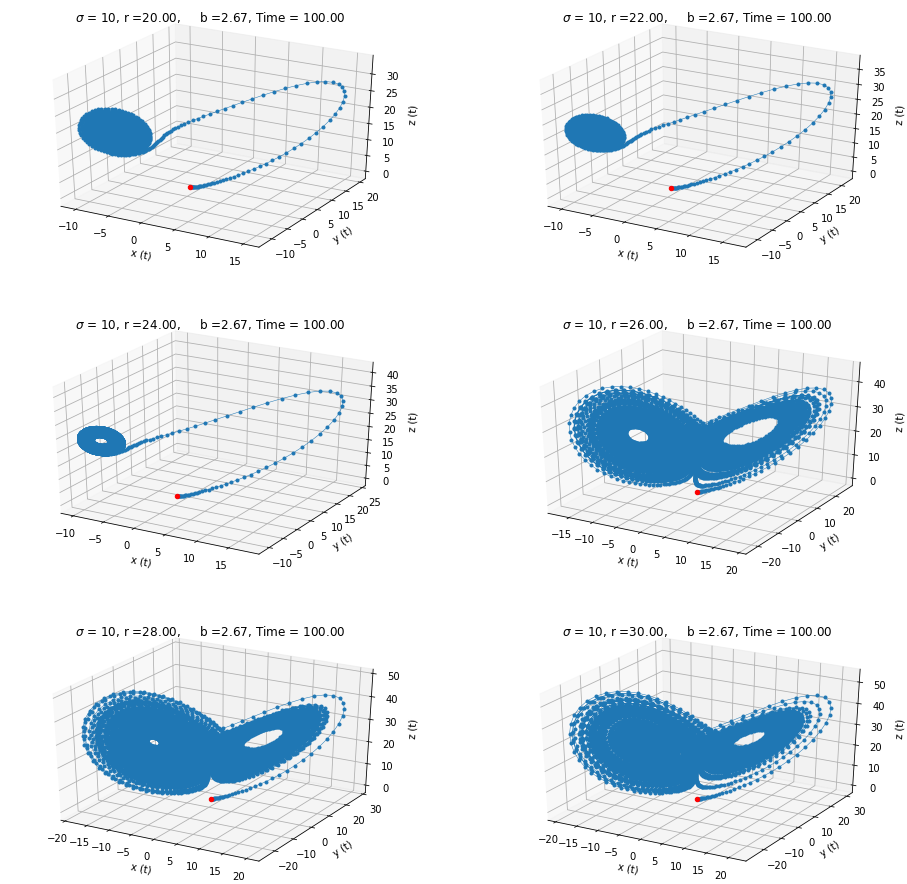

In [ ]:
fig = plt.figure(figsize=(16,16))
rs = np.linspace(20, 30, 6)

for i in range(len(rs)):
    ax = fig.add_subplot(3,2,i+1, projection = '3d')

    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(10000):
        sys.update()

    points = np.array([sys.xs, sys.ys, sys.zs])
    ax.plot(points[0], points[1], points[2], marker = '.', linewidth = 0.5)
    ax.scatter(*points.T[0], color = 'red')
    
    plt.title(f'$\sigma$ = {sys.sigma}, r ={sys.r:0.2f}, \
    b ={sys.b:0.2f}, Time = {sys.ts[-1]:0.2f}')
    ax.set_xlabel('x (t)')
    ax.set_ylabel('y (t)')
    ax.set_zlabel('z (t)')

plt.show()



Now from the 3D trajectory, we can confirm that the previous features found in the $x(t), y(t)$ and $z(t)$ are mainly due to having either one lobe or two lobe in the attractor. 

For smaller r values $(r\leq 24)$, we only have one lobe and for higher r values $r\geq 25$, we have two lobe. The $x$ and $y$ of the centers of both lobes are very different. That's why we got the clear jumping between two oscillations in (x vs t) and (y vs t) plots. But the $z$ of the centers of lobes are very similar. Thus, the two oscillations almost have similar center in (z vs t) plot.

We can focus on the critical region and run for longer time to lower our uncertainity on the critical value.

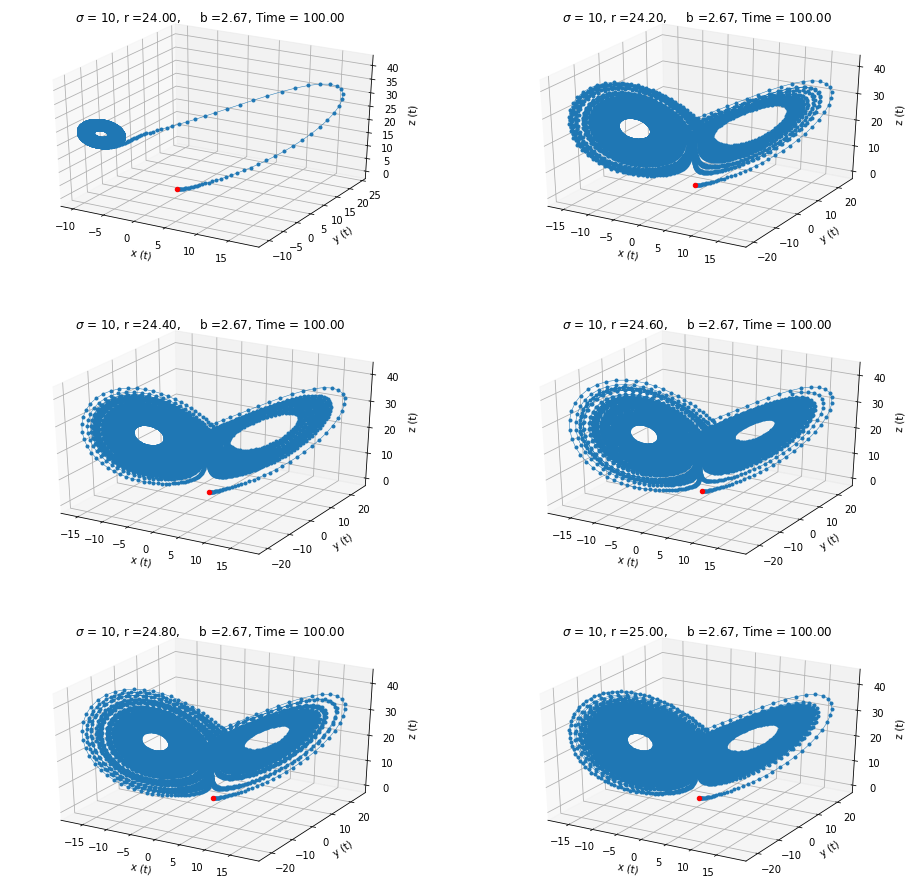

In [ ]:
fig = plt.figure(figsize=(16,16))
rs = np.linspace(24, 25, 6)

for i in range(len(rs)):
    ax = fig.add_subplot(3,2,i+1, projection = '3d')

    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(10000):
        sys.update()

    points = np.array([sys.xs, sys.ys, sys.zs])
    ax.plot(points[0], points[1], points[2], marker = '.', linewidth = 0.5)
    ax.scatter(*points.T[0], color = 'red')
    
    plt.title(f'$\sigma$ = {sys.sigma}, r ={sys.r:0.2f}, \
    b ={sys.b:0.2f}, Time = {sys.ts[-1]:0.2f}')
    ax.set_xlabel('x (t)')
    ax.set_ylabel('y (t)')
    ax.set_zlabel('z (t)')

plt.show()



Animation: [3D trajectory for varying r](https://drive.google.com/file/d/1NLmqcWCPnbAvh9yCax3UX2f-yBQPlyDS/view?usp=sharing)

We can find two lobes even for as low as $r = 24.20$. So we can say that, the critical points for r lying in the range $24\leq r \leq 24.20$.

## Part (d)

In [ ]:
y0_1 = 1
y0_2 = 1.0000001
sys1 = ConvectionRoll(0, y0_1, 0, sigma=10, b = 8/3, r = 28, dt = 0.01)
sys2 = ConvectionRoll(0, y0_2, 0, sigma=10, b = 8/3, r = 28, dt = 0.01)

In [ ]:
for i in range(10000):
    sys1.update()
    sys2.update()

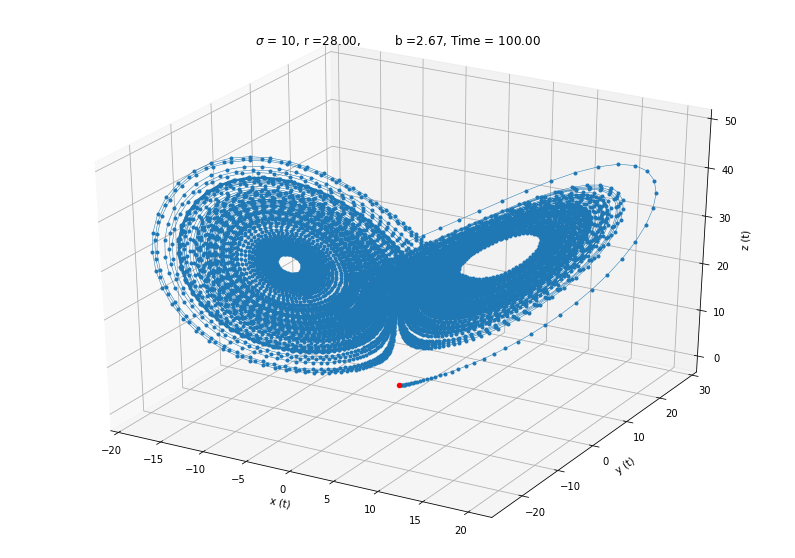

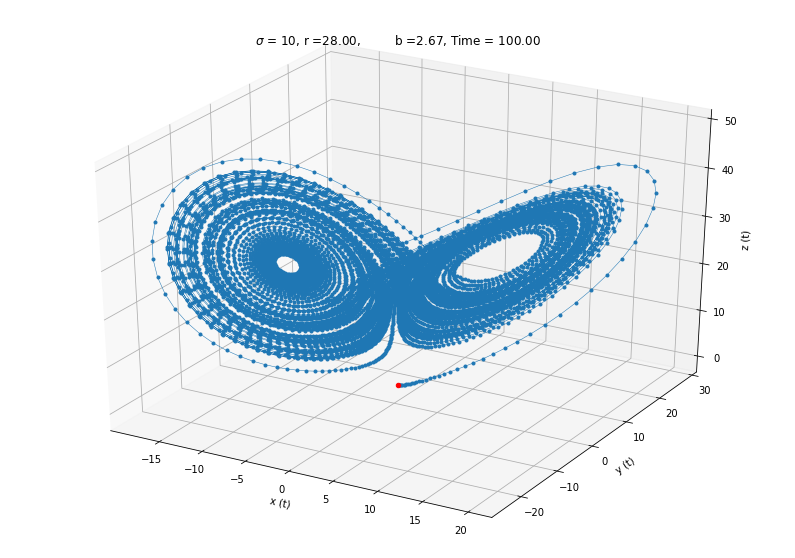

In [ ]:
sys1.display()
sys2.display()

Both of the system ends up in the attractor as expected. But now we need to check whether they are staying close to each other while moving along the attractor.

We can find their distance and plot the distance over time.

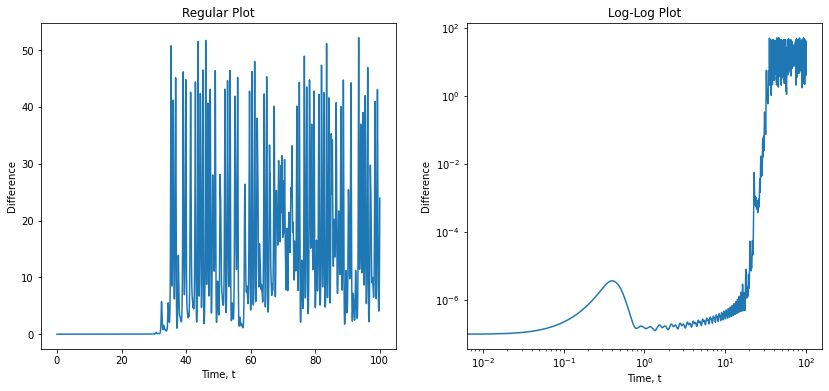

In [ ]:
del_x = np.array(sys1.xs) - np.array(sys2.xs)
del_y = np.array(sys1.ys) - np.array(sys2.ys)
del_z = np.array(sys1.zs) - np.array(sys2.zs)
difference = np.sqrt(del_x**2 + del_y**2 + del_z**2)

plt.figure(figsize = (14,6))

plt.subplot(121)
plt.plot(sys1.ts, difference)
plt.xlabel('Time, t')
plt.ylabel('Difference')
plt.title('Regular Plot')

plt.subplot(122)
plt.loglog(sys1.ts, difference)
plt.xlabel('Time, t')
plt.ylabel('Difference')
plt.title('Log-Log Plot')

plt.show()

**Animation:** [Lorentz Attractor for two almost similar initial condition](https://drive.google.com/file/d/1j0HK1ZXkxXPQsSa79jm5N_Jhp3fuVUK4/view?usp=sharing)

From the plots, we can see that the difference between these two points were pretty close to each other upto $t = 20$. Then from around $t=30$, the differene becomes larger. But instead of growing, the difference is also oscillating over time (i.e. increases and decreasing arbitarily).

The log-log plot shows that the difference increased quite a lot from $t = 10^1 = 10$ to $t \approx 4\times 10^1 = 40$. Then they start to oscillate. But still the lower value of the oscillation is very large compare to their initial separation.

The animation shows more clear picture on how these two very close points moves through the system over time. They both end up in the attractor as expected and they stay very close upto $t = 32$. Then they separated from each other and start following the attractor pattern independently. They follow a very different and distinct path along the attractor and there is no way that one can estimate that these two points starts very very close. Note that, as both of them have to stay in the attractor, there is a maximum difference that they can have. Also sometimes they cross paths, so the distance become quite small for a certain amount of time. This is why we can see the oscillatory change in the differences after they separated from each other.

## Animation Codes

In [ ]:
from IPython.display import HTML

def make_animation(systems, n_update = 30, n_animate = 50, interval = 200):
    n = len(systems)

    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111, projection = '3d')
    lines = [None]*n

    for k in range(n):
        sys = systems[k]
        points = np.array([sys.xs, sys.ys, sys.zs])
        lines[k], = ax.plot(points[0], points[1], points[2], marker = '.', 
                        linewidth = 0.5, color = 'C'+str(k))

    def animate(i):
        for _ in range(n_update):
            for sys in systems:
                sys.update()
        
        for k in range(n):
            sys = systems[k]
            points = np.array([sys.xs, sys.ys, sys.zs])
            lines[k], = ax.plot(points[0], points[1], points[2], marker = '.', 
                            linewidth = 0.5, color = 'C'+str(k))
        ax.set_title(f'$\sigma$ = {sys.sigma}, r = {sys.r:0.2f}, b = {sys.b:0.2f}, Time = {sys.ts[-1]:0.2f}', loc = 'center')
        return lines

    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('X')

    ax.set_ylim3d([-20, 20])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0, 40])
    ax.set_zlabel('Z')

    

    # starts animation
    ani = animation.FuncAnimation(fig, animate, n_animate, interval = interval, blit = True)
    
    return ani



**Animation:** [Lorentz Attractor for R = 20](https://drive.google.com/file/d/1caopFCFCuEXVOMSrUffhTtBZeUP5GQpb/view?usp=sharing)

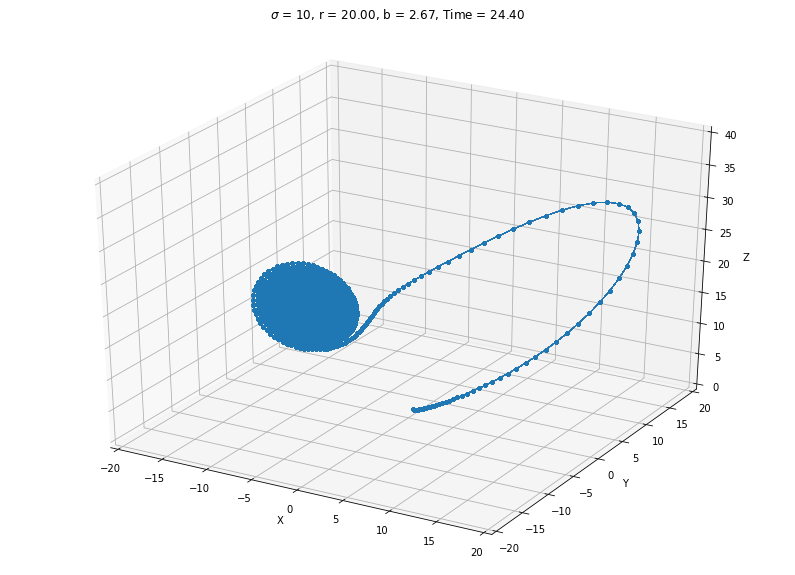

In [ ]:
y0_1 = 1
sys1 = ConvectionRoll(0, y0_1, 0, sigma=10, b = 8/3, r = 20, dt = 0.01)

ani = make_animation([sys1], n_update=20, n_animate=120)
HTML(ani.to_html5_video())

**Animation:** [Lorentz Attractor for R = 28](https://drive.google.com/file/d/1ybFz8PKssfjLG4eLK8lcXui_GDof4_zS/view?usp=sharing)

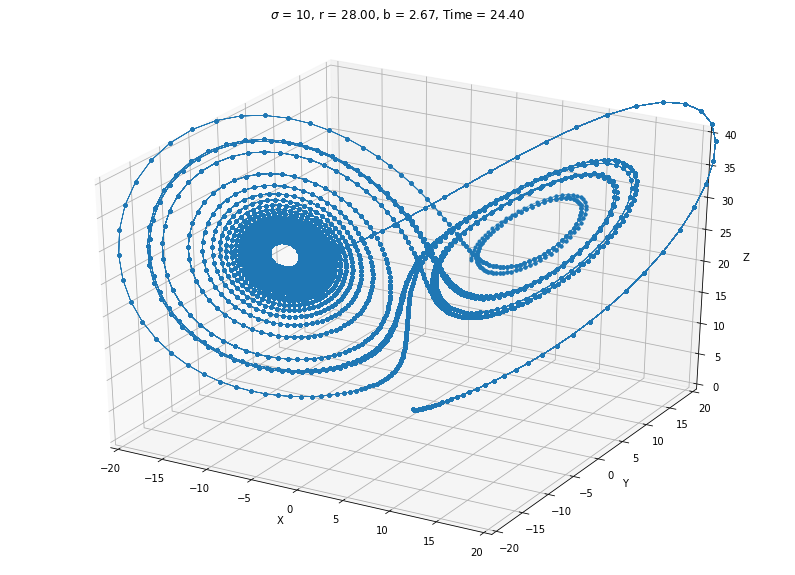

In [ ]:
y0_1 = 1
sys1 = ConvectionRoll(0, y0_1, 0, sigma=10, b = 8/3, r = 28, dt = 0.01)

ani = make_animation([sys1], n_update=20, n_animate=120)
HTML(ani.to_html5_video())

**Animation:** [x(t) for varying r](https://drive.google.com/file/d/1JTg6JK-dOn9SFHYPKe_MGaPYsxTFrS5J/view?usp=sharing)

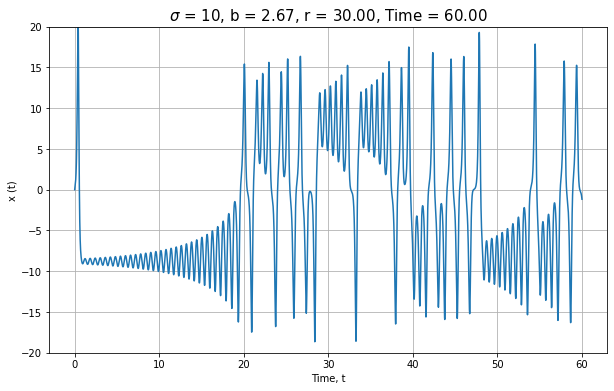

In [ ]:

sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=20, dt= 0.01)

n_animate = 44 
interval = 800

fig = plt.figure(figsize = (10,6))
ax = plt.subplot(ylim=(-20, 20))

lines = [None]


rs = np.linspace(20,30,n_animate)

def animate(i):
    ax.clear()
    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(6000):
        sys.update()

    lines[0], = ax.plot(sys.ts, sys.xs)

    # Setting the axes properties
    ax.set_xlabel('Time, t')

    ax.set_ylim([-20, 20])
    ax.set_ylabel('x (t)')
    
    ax.set_title(f'$\sigma$ = {sys.sigma}, b = {sys.b:0.2f}, r = {sys.r:0.2f}, Time = {sys.ts[-1]:0.2f}', 
                 loc = 'center', fontweight = 3, fontsize = 15)
    plt.grid()
    return lines

# starts animation
ani = animation.FuncAnimation(fig, animate, n_animate, interval = interval, blit = True)
    
HTML(ani.to_html5_video())


**Animation:** [y(t) for varying r](https://drive.google.com/file/d/1AlQrFtzOO9NZ74lkJiwjjoc_Ic8th3Xz/view?usp=sharing)

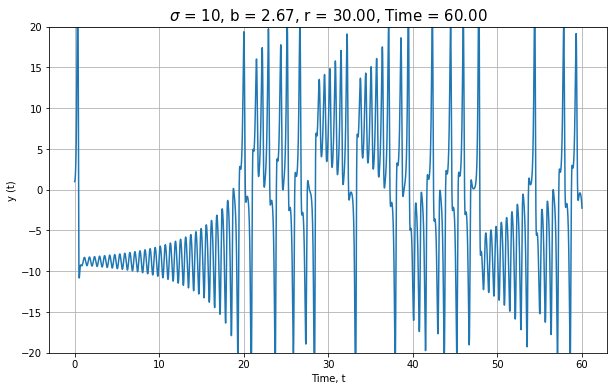

In [ ]:

sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=20, dt= 0.01)

n_animate = 44 
interval = 800

fig = plt.figure(figsize = (10,6))
ax = plt.subplot(ylim=(-20, 20))

lines = [None]


rs = np.linspace(20,30,n_animate)

def animate(i):
    ax.clear()
    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(6000):
        sys.update()

    lines[0], = ax.plot(sys.ts, sys.ys)

    # Setting the axes properties
    ax.set_xlabel('Time, t')

    ax.set_ylim([-20, 20])
    ax.set_ylabel('y (t)')
    
    ax.set_title(f'$\sigma$ = {sys.sigma}, b = {sys.b:0.2f}, r = {sys.r:0.2f}, Time = {sys.ts[-1]:0.2f}', 
                 loc = 'center', fontweight = 3, fontsize = 15)
    plt.grid()
    return lines

# starts animation
ani = animation.FuncAnimation(fig, animate, n_animate, interval = interval, blit = True)
    
HTML(ani.to_html5_video())


**Animation:** [z(t) for varying r](https://drive.google.com/file/d/1HJSLT93sthyNfs_uqUD83zzPZpKK1Pqt/view?usp=sharing)

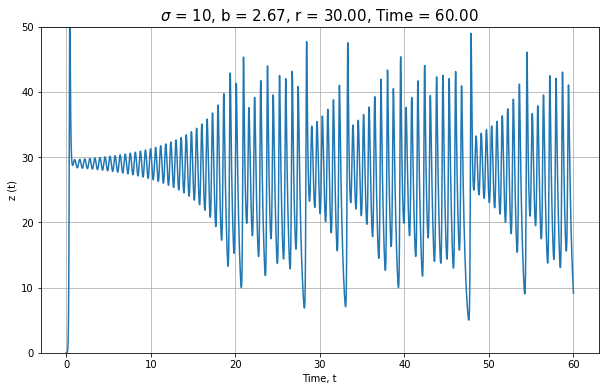

In [ ]:

sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=20, dt= 0.01)

n_animate = 44 
interval = 800

fig = plt.figure(figsize = (10,6))
ax = plt.subplot(ylim=(0, 50))

lines = [None]


rs = np.linspace(20,30,n_animate)

def animate(i):
    ax.clear()
    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(6000):
        sys.update()

    lines[0], = ax.plot(sys.ts, sys.zs)

    # Setting the axes properties
    ax.set_xlabel('Time, t')

    ax.set_ylim([0, 50])
    ax.set_ylabel('z (t)')
    
    ax.set_title(f'$\sigma$ = {sys.sigma}, b = {sys.b:0.2f}, r = {sys.r:0.2f}, Time = {sys.ts[-1]:0.2f}', 
                 loc = 'center', fontweight = 3, fontsize = 15)
    plt.grid()
    return lines

# starts animation
ani = animation.FuncAnimation(fig, animate, n_animate, interval = interval, blit = True)
    
HTML(ani.to_html5_video())


**Animation:** [3D trajectory for varying r](https://drive.google.com/file/d/1NLmqcWCPnbAvh9yCax3UX2f-yBQPlyDS/view?usp=sharing)

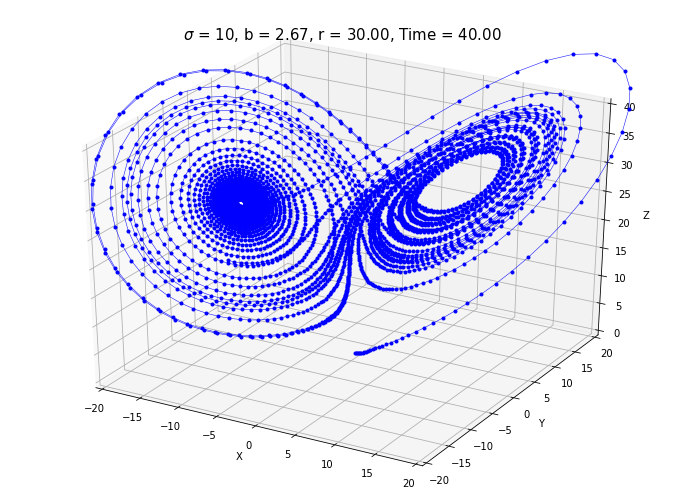

In [ ]:

sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=20, dt= 0.01)

n_animate = 41 
interval = 600

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection = '3d')
lines = [None]

points = np.array([sys.xs, sys.ys, sys.zs])
lines[0], = ax.plot(points[0], points[1], points[2], marker = '.', 
                    linewidth = 0.5, color = 'blue')

# Setting the axes properties
ax.set_xlim3d([-20, 20])
ax.set_xlabel('X')

ax.set_ylim3d([-20, 20])
ax.set_ylabel('Y')

ax.set_zlim3d([0, 40])
ax.set_zlabel('Z')

rs = np.linspace(20,30,n_animate)

def animate(i):
    ax.clear()
    r = rs[i]
    sys = ConvectionRoll(0,1,0, sigma=10, b=8/3, r=r, dt= 0.01)
    for _ in range(4000):
        sys.update()

    points = np.array([sys.xs, sys.ys, sys.zs])
    lines[0], = ax.plot(points[0], points[1], points[2], marker = '.', 
                    linewidth = 0.5, color = 'blue')
    
    ax.set_title(f'$\sigma$ = {sys.sigma}, b = {sys.b:0.2f}, r = {sys.r:0.2f}, Time = {sys.ts[-1]:0.2f}', 
                 loc = 'center', fontweight = 3, fontsize = 15)
    
    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('X')

    ax.set_ylim3d([-20, 20])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0, 40])
    ax.set_zlabel('Z')

    return lines

# starts animation
ani = animation.FuncAnimation(fig, animate, n_animate, interval = interval, blit = True)
    
HTML(ani.to_html5_video())


**Animation:** [Lorentz Attractor for two almost similar initial condition](https://drive.google.com/file/d/1j0HK1ZXkxXPQsSa79jm5N_Jhp3fuVUK4/view?usp=sharing)

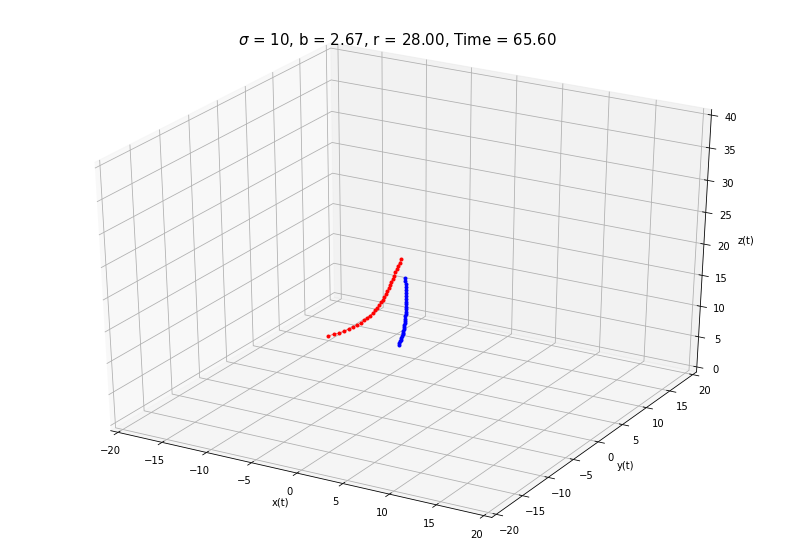

In [ ]:
y0_1 = 1
y0_2 = 1.0000001
sys1 = ConvectionRoll(0, y0_1, 0, sigma=10, b = 8/3, r = 28, dt = 0.01)
sys2 = ConvectionRoll(0, y0_2, 0, sigma=10, b = 8/3, r = 28, dt = 0.01)

n_update = 30

initial_steps = 2000
for _ in range(initial_steps):
    sys1.update()
    sys2.update()

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection = '3d')
lines = [None, None]

points = np.array([sys1.xs, sys1.ys, sys1.zs])
lines[0], = ax.plot(points[0][-n_update:], points[1][-n_update:], 
                    points[2][-n_update:], marker = '.', 
                    linewidth = 0.5, color = 'blue')
points = np.array([sys2.xs, sys2.ys, sys2.zs])
lines[1], = ax.plot(points[0][-n_update:], points[1][-n_update:], 
                    points[2][-n_update:], marker = '.', 
                    linewidth = 0.5, color = 'red')

# Setting the axes properties
ax.set_xlim3d([-20, 20])
ax.set_xlabel('x(t)')

ax.set_ylim3d([-20, 20])
ax.set_ylabel('y(t)')

ax.set_zlim3d([0, 40])
ax.set_zlabel('z(t)')

def animate(i):
    ax.clear()
    for _ in range(n_update):
        sys1.update()
        sys2.update()
    
    points = np.array([sys1.xs, sys1.ys, sys1.zs])
    lines[0], = ax.plot(points[0][-n_update:], points[1][-n_update:], 
                        points[2][-n_update:], marker = '.', 
                        linewidth = 0.5, color = 'blue')
    points = np.array([sys2.xs, sys2.ys, sys2.zs])
    lines[1], = ax.plot(points[0][-n_update:], points[1][-n_update:], 
                        points[2][-n_update:], marker = '.', 
                        linewidth = 0.5, color = 'red')

    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('x(t)')

    ax.set_ylim3d([-20, 20])
    ax.set_ylabel('y(t)')

    ax.set_zlim3d([0, 40])
    ax.set_zlabel('z(t)')

    ax.set_title(f'$\sigma$ = {sys1.sigma}, b = {sys1.b:0.2f}, r = {sys1.r:0.2f}, Time = {sys1.ts[-1]:0.2f}', 
                loc = 'center', fontweight = 3, fontsize = 15)

    return lines


# starts animation
ani = animation.FuncAnimation(fig, animate, 150, interval = 200, blit = True)
HTML(ani.to_html5_video())